# Submission

Put the ipynb file and html file in the github branch you created in the last assignment and submit the link to the commit in brightspace

In [71]:
from plotly.offline import init_notebook_mode
import plotly.io as pio
import plotly.express as px
import math
import numpy as np

init_notebook_mode(connected=True)
pio.renderers.default = "plotly_mimetype+notebook"

In [2]:
#load data
df = px.data.gapminder()
df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

## Question 1:

Recreate the barplot below that shows the population of different continents for the year 2007. 

*Hints:*

- Extract the 2007 year data from the dataframe. You have to process the data accordingly
- use [plotly bar](https://plotly.com/python-api-reference/generated/plotly.express.bar)
- Add different colors for different continents
- Sort the order of the continent for the visualisation. Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)
- Add text to each bar that represents the population 

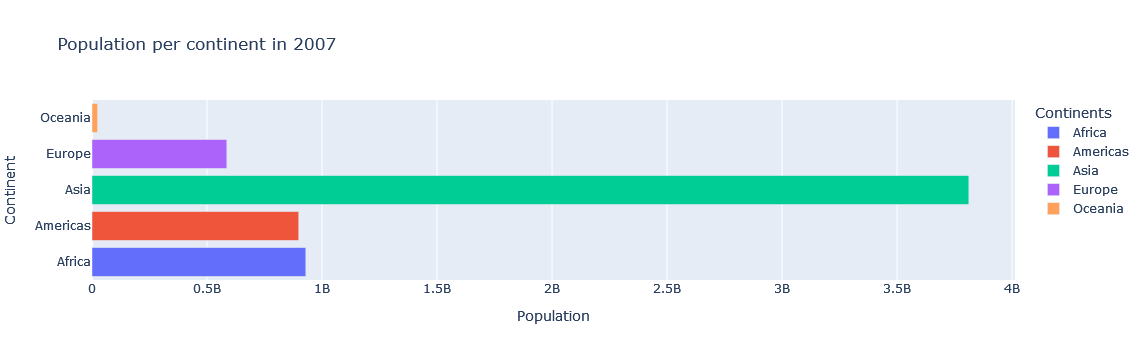

In [10]:
# YOUR CODE HERE
data = df[df["year"] == 2007].groupby("continent").sum()

fig = px.bar(x=data["pop"], y=data.index, color=data.index, title="Population per continent in 2007", labels={"x": "Population", "y": "Continent", "color": "Continents"})
fig.show()

## Question 2:

Sort the order of the continent for the visualisation

Hint: Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)

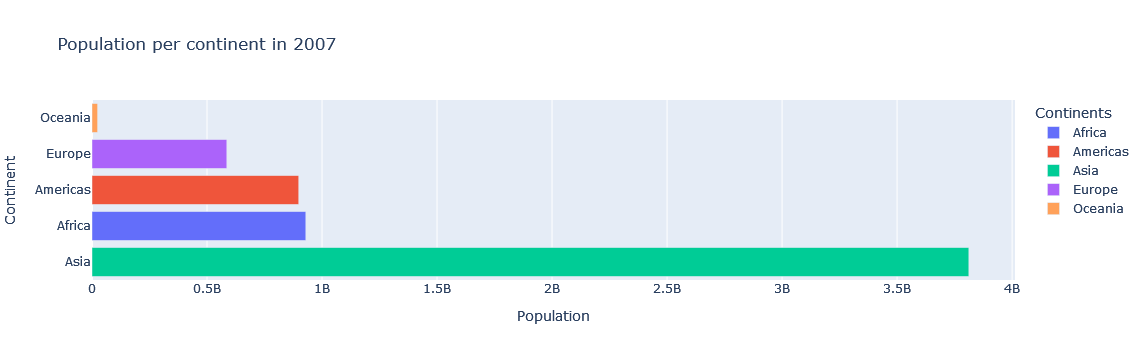

In [9]:
# YOUR CODE HERE
data = df[df["year"] == 2007].groupby("continent").sum()

fig = px.bar(x=data["pop"], y=data.index, color=data.index, title="Population per continent in 2007", labels={"x": "Population", "y": "Continent", "color": "Continents"})
fig.update_yaxes(categoryorder="total descending")
fig.show()

## Question 3:

Add text to each bar that represents the population 

In [101]:
# from https://stackoverflow.com/questions/3154460/python-human-readable-large-numbers
millnames = ['',' Thousand',' Million',' Billion',' Trillion']
def millify(n):
    n = float(n)
    millidx = max(0, min(len(millnames)-1, int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    # Slight change here to have 1 decimal instead of 0 decimals
    return '{:.1f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

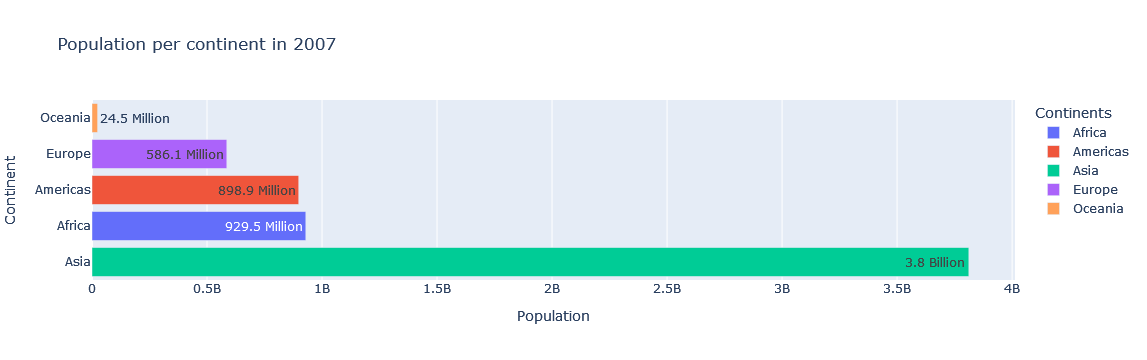

In [102]:
# YOUR CODE HERE
data = df[df["year"] == 2007].groupby("continent").sum()

text = {}
for cont in data.index.array:
    text[cont]= millify(data.loc[cont, "pop"])

fig = px.bar(x=data["pop"], y=data.index, color=data.index, title="Population per continent in 2007", text=text, labels={"x": "Population", "y": "Continent", "color": "Continents"})
fig.update_yaxes(categoryorder="total descending")
fig.show()

## Question 4:

Thus far we looked at data from one year (2007). Lets create an animation to see the population growth of the continents through the years


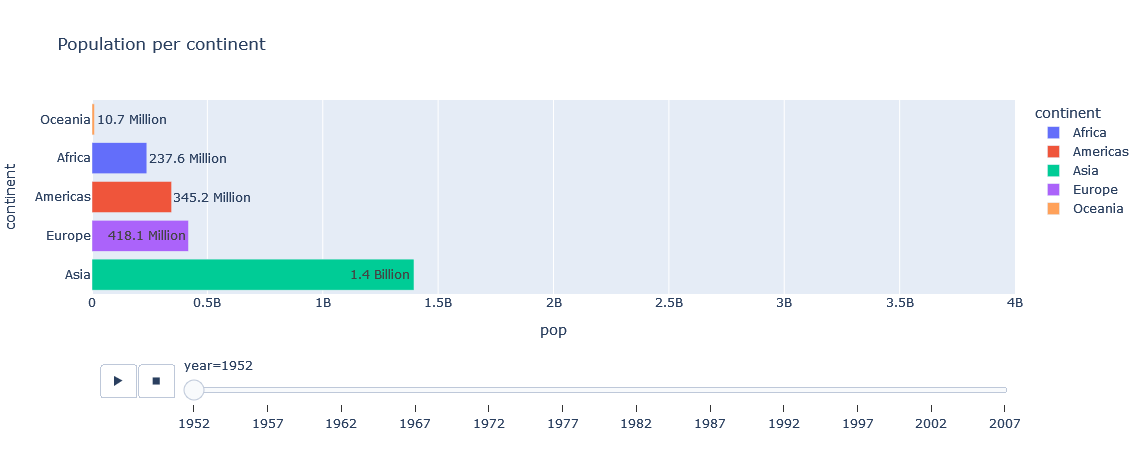

In [121]:
# YOUR CODE HERE
data = df.groupby(["continent", "year"]).sum()

index = data.index.to_numpy()
year = np.zeros(len(index), dtype=int)
continent = np.empty(len(index), dtype=object)
pop_text = np.empty(len(index), dtype=object)

for i in range(len(index)):
    year[i] = index[i][1]
    continent[i] = index[i][0]
    pop_text[i] = millify(data.loc[index[i], "pop"])
    
data["year"] = year
data["continent"] = continent
data["pop_text"] = pop_text

fig = px.bar(data, x="pop", y="continent", color="continent", animation_frame="year", animation_group="continent", range_x=[0, 4000000000], height=450, text="pop_text", title="Population per continent", labels={"x": "Population", "y": "Continent", "color": "Continents"})
fig.update_yaxes(categoryorder="total descending")
fig.show()

## Question 5:

Instead of the continents, lets look at individual countries. Create an animation that shows the population growth of the countries through the years

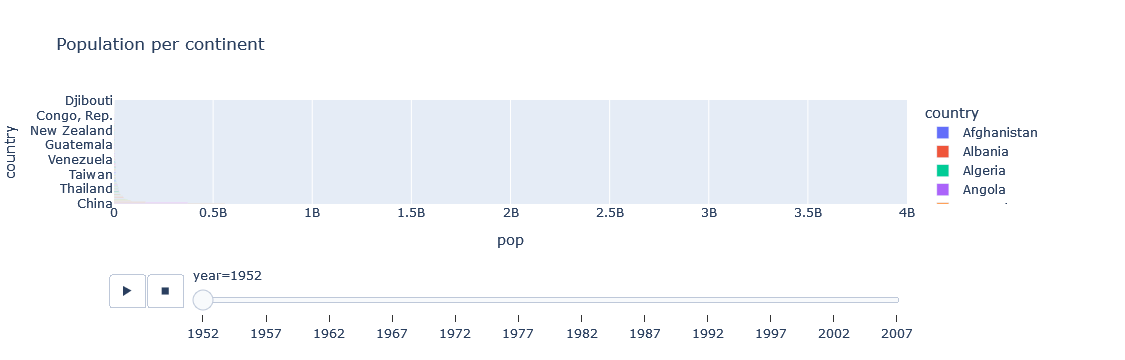

In [118]:
# YOUR CODE HERE
data = df.copy()

index = data.index.to_numpy()
pop_text = np.empty(len(index), dtype=object)

for i in range(len(index)):
    pop_text[i] = millify(data.loc[index[i], "pop"])
    
data["pop_text"] = pop_text

fig = px.bar(data, x="pop", y="country", color="country", animation_frame="year", animation_group="country", range_x=[0, 4000000000], text="pop_text", title="Population per continent", labels={"x": "Population", "y": "Continent", "color": "Continents"})
fig.update_yaxes(categoryorder="total descending")
fig.show()

## Question 6:

Clean up the country animation. Set the height size of the figure to 1000 to have a better view of the animation

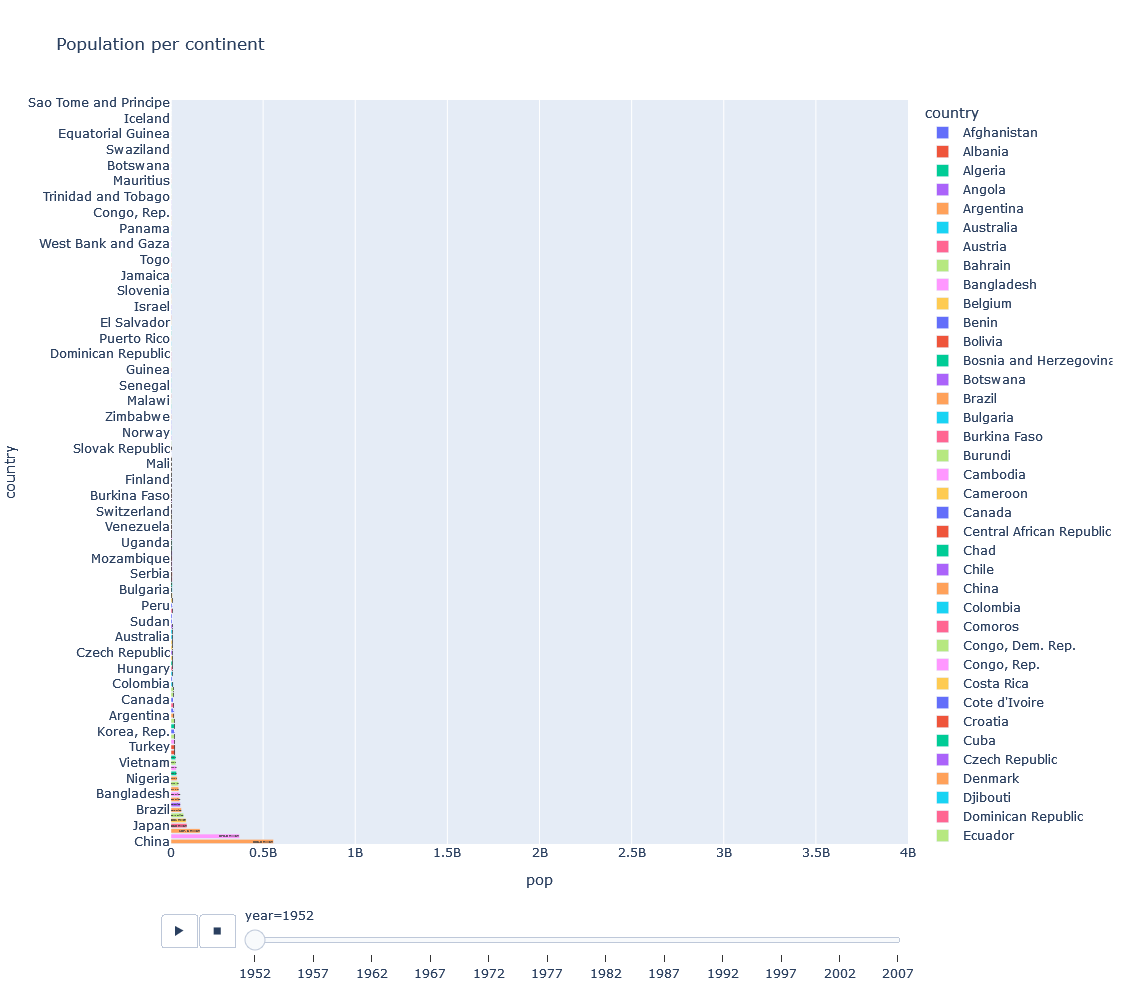

In [119]:
# YOUR CODE HERE
data = df.copy()

index = data.index.to_numpy()
pop_text = np.empty(len(index), dtype=object)

for i in range(len(index)):
    pop_text[i] = millify(data.loc[index[i], "pop"])
    
data["pop_text"] = pop_text

fig = px.bar(data, x="pop", y="country", color="country", animation_frame="year", animation_group="country", range_x=[0, 4000000000], height=1000, text="pop_text", title="Population per continent", labels={"x": "Population", "y": "Continent", "color": "Continents"})
fig.update_yaxes(categoryorder="total descending")
fig.show()

## Question 7:

Show only the top 10 countries in the animation

Hint: Use the axis limit to set this. 

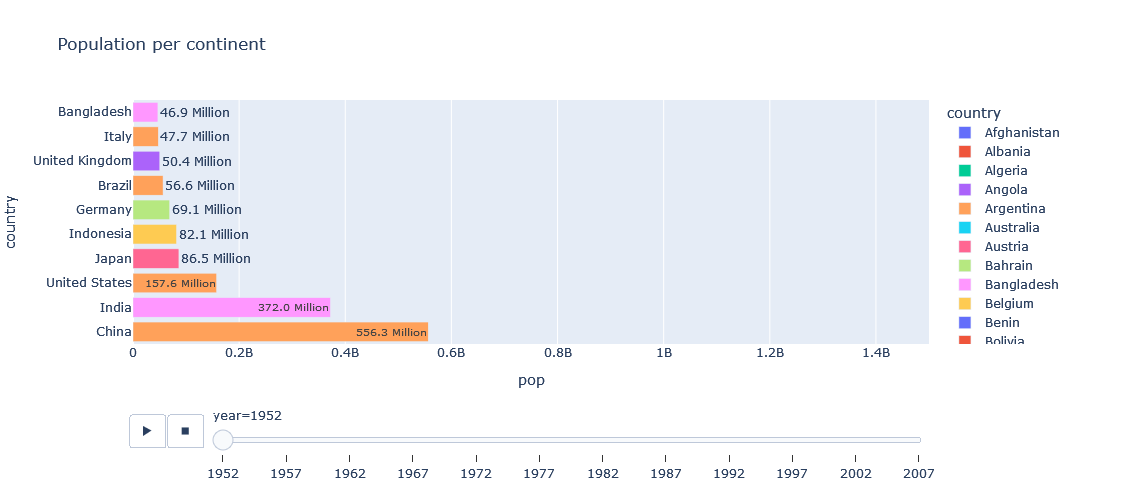

In [132]:
# YOUR CODE HERE
data = df.copy()

index = data.index.to_numpy()
pop_text = np.empty(len(index), dtype=object)

for i in range(len(index)):
    pop_text[i] = millify(data.loc[index[i], "pop"])
    
data["pop_text"] = pop_text

fig = px.bar(data, x="pop", y="country", color="country", animation_frame="year", animation_group="country", range_x=[0, 1500000000], height=500, text="pop_text", title="Population per continent", labels={"x": "Population", "y": "Continent", "color": "Continents"})
fig.update_yaxes(categoryorder="total descending", range=[-0.5, 9.5])
fig.show()